## <p align='center'>EDA on RCS Lifetime Stats By Month Dataset</p>

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
rcs = pd.read_csv("rcs_lifetime_stats_by_month_v.csv")
rcs

FileNotFoundError: [Errno 2] No such file or directory: 'rcs_lifetime_stats_by_month_v.csv'

In [ ]:
# Show basic information about the dataframe 
rcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   instance_id                        856 non-null    object 
 1   client_name                        856 non-null    object 
 2   site_name                          856 non-null    object 
 3   region_name                        155 non-null    object 
 4   client_region_name                 856 non-null    object 
 5   site_region_name                   856 non-null    object 
 6   month_date                         856 non-null    object 
 7   total_lifetimes                    856 non-null    int64  
 8   total_user_days_online_this_month  856 non-null    int64  
 9   total_users_online_this_month      856 non-null    int64  
 10  avg_daily_engagement_score         839 non-null    float64
 11  total_lifetime_days                856 non-null    int64  

In [ ]:
#Number of Categorical Columns
categorical_cols = rcs.select_dtypes(include='object').columns
print(f"Categorical Variables: {len(categorical_cols)}")

Categorical Variables: 7


In [ ]:
#Number of Numerical Columns
numeric_cols = rcs.select_dtypes(exclude='object').columns
print(f"Numerical Variables: {len(numeric_cols)}")

Numerical Variables: 23


In [ ]:
# Descriptive statistics for numeric data (transposed for readability)
rcs.describe().T

,count,mean,std,min,25%,50%,75%,max
total_lifetimes,856.0,1.143505e+05,2.142195e+05,1.0,2105.000000,10693.000000,1.068470e+05,1.072601e+06
total_user_days_online_this_month,856.0,1.011383e+04,2.171912e+04,0.0,92.000000,496.500000,5.347250e+03,1.562620e+05
total_users_online_this_month,856.0,2.159675e+03,4.173432e+03,0.0,34.000000,169.000000,1.789500e+03,2.257700e+04
avg_daily_engagement_score,839.0,3.144853e+00,2.467536e+00,0.0,1.332521,2.526344,4.528416e+00,1.377476e+01
total_lifetime_days,856.0,1.219654e+07,2.817213e+07,1.0,51213.000000,414189.000000,5.641198e+06,1.912334e+08
li_attempts,856.0,1.497727e+04,3.520214e+04,0.0,45.750000,504.500000,7.356000e+03,3.719280e+05
mission_step_completions,856.0,1.678498e+03,5.981676e+03,0.0,0.000000,0.000000,8.425000e+01,4.946500e+04
rewards_claimed,856.0,1.764966e+03,8.345955e+03,0.0,0.000000,0.000000,8.650000e+01,9.707100e+04
rank_completions,856.0,4.498271e+02,1.273969e+03,0.0,0.000000,1.000000,1.147500e+02,1.294500e+04
sale_submissions,856.0,2.563678e+03,8.687546e+03,0.0,0.000000,0.000000,0.000000e+00,6.288600e+04


In [ ]:
# Check for missing values in each column
rcs.isnull().sum()

instance_id                            0
client_name                            0
site_name                              0
region_name                          701
client_region_name                     0
site_region_name                       0
month_date                             0
total_lifetimes                        0
total_user_days_online_this_month      0
total_users_online_this_month          0
avg_daily_engagement_score            17
total_lifetime_days                    0
li_attempts                            0
mission_step_completions               0
rewards_claimed                        0
rank_completions                       0
sale_submissions                       0
user_referrals                         0
badge_completions                      0
banner_clicks                          0
poll_completions                       0
survey_completions                     0
certification_completions              0
achievement_completions                0
community_commen

In [ ]:
# Function to display count and calculate percentages for missing values
def missingcolperc(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum/total
        pct = df[col].isnull().mean()*100
        if missing_vals != 0:
            print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals

    if total == 0:
        print("No missing values")

# Call the function with the dataframe
missingcolperc(rcs)

region_name => 701 [81.89%]
avg_daily_engagement_score => 17 [1.99%]


In [ ]:
# Check for duplicated
rcs.duplicated().sum()

np.int64(0)

In [ ]:
# Convert the 'month_date' column to datetime format
rcs['month_date'] = pd.to_datetime(rcs['month_date'], errors='coerce', dayfirst=True)

In [ ]:
# Fill missing values
rcs['region_name'] = rcs['region_name'].fillna('NA')
rcs['avg_daily_engagement_score'] = rcs['avg_daily_engagement_score'].fillna('0')

In [ ]:
# Check missing values
rcs.isnull().sum()

instance_id                          0
client_name                          0
site_name                            0
region_name                          0
client_region_name                   0
site_region_name                     0
month_date                           0
total_lifetimes                      0
total_user_days_online_this_month    0
total_users_online_this_month        0
avg_daily_engagement_score           0
total_lifetime_days                  0
li_attempts                          0
mission_step_completions             0
rewards_claimed                      0
rank_completions                     0
sale_submissions                     0
user_referrals                       0
badge_completions                    0
banner_clicks                        0
poll_completions                     0
survey_completions                   0
certification_completions            0
achievement_completions              0
community_comments                   0
community_replies        

In [ ]:
# Detect outliers in all numeric columns (IQR method)
numeric_cols = rcs.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = rcs[col].quantile(0.25)
    Q3 = rcs[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = rcs[(rcs[col] < lower_bound) | (rcs[col] > upper_bound)]
    print(f"{col} → {len(outliers)} outliers detected")

total_lifetimes → 123 outliers detected
total_user_days_online_this_month → 185 outliers detected
total_users_online_this_month → 141 outliers detected
total_lifetime_days → 163 outliers detected
li_attempts → 163 outliers detected
mission_step_completions → 178 outliers detected
rewards_claimed → 159 outliers detected
rank_completions → 175 outliers detected
sale_submissions → 174 outliers detected
user_referrals → 138 outliers detected
badge_completions → 147 outliers detected
banner_clicks → 153 outliers detected
poll_completions → 161 outliers detected
survey_completions → 124 outliers detected
certification_completions → 41 outliers detected
achievement_completions → 167 outliers detected
community_comments → 165 outliers detected
community_replies → 98 outliers detected
community_likes → 155 outliers detected
snippets_created → 69 outliers detected
snippets_viewed → 169 outliers detected
engagement_score → 135 outliers detected


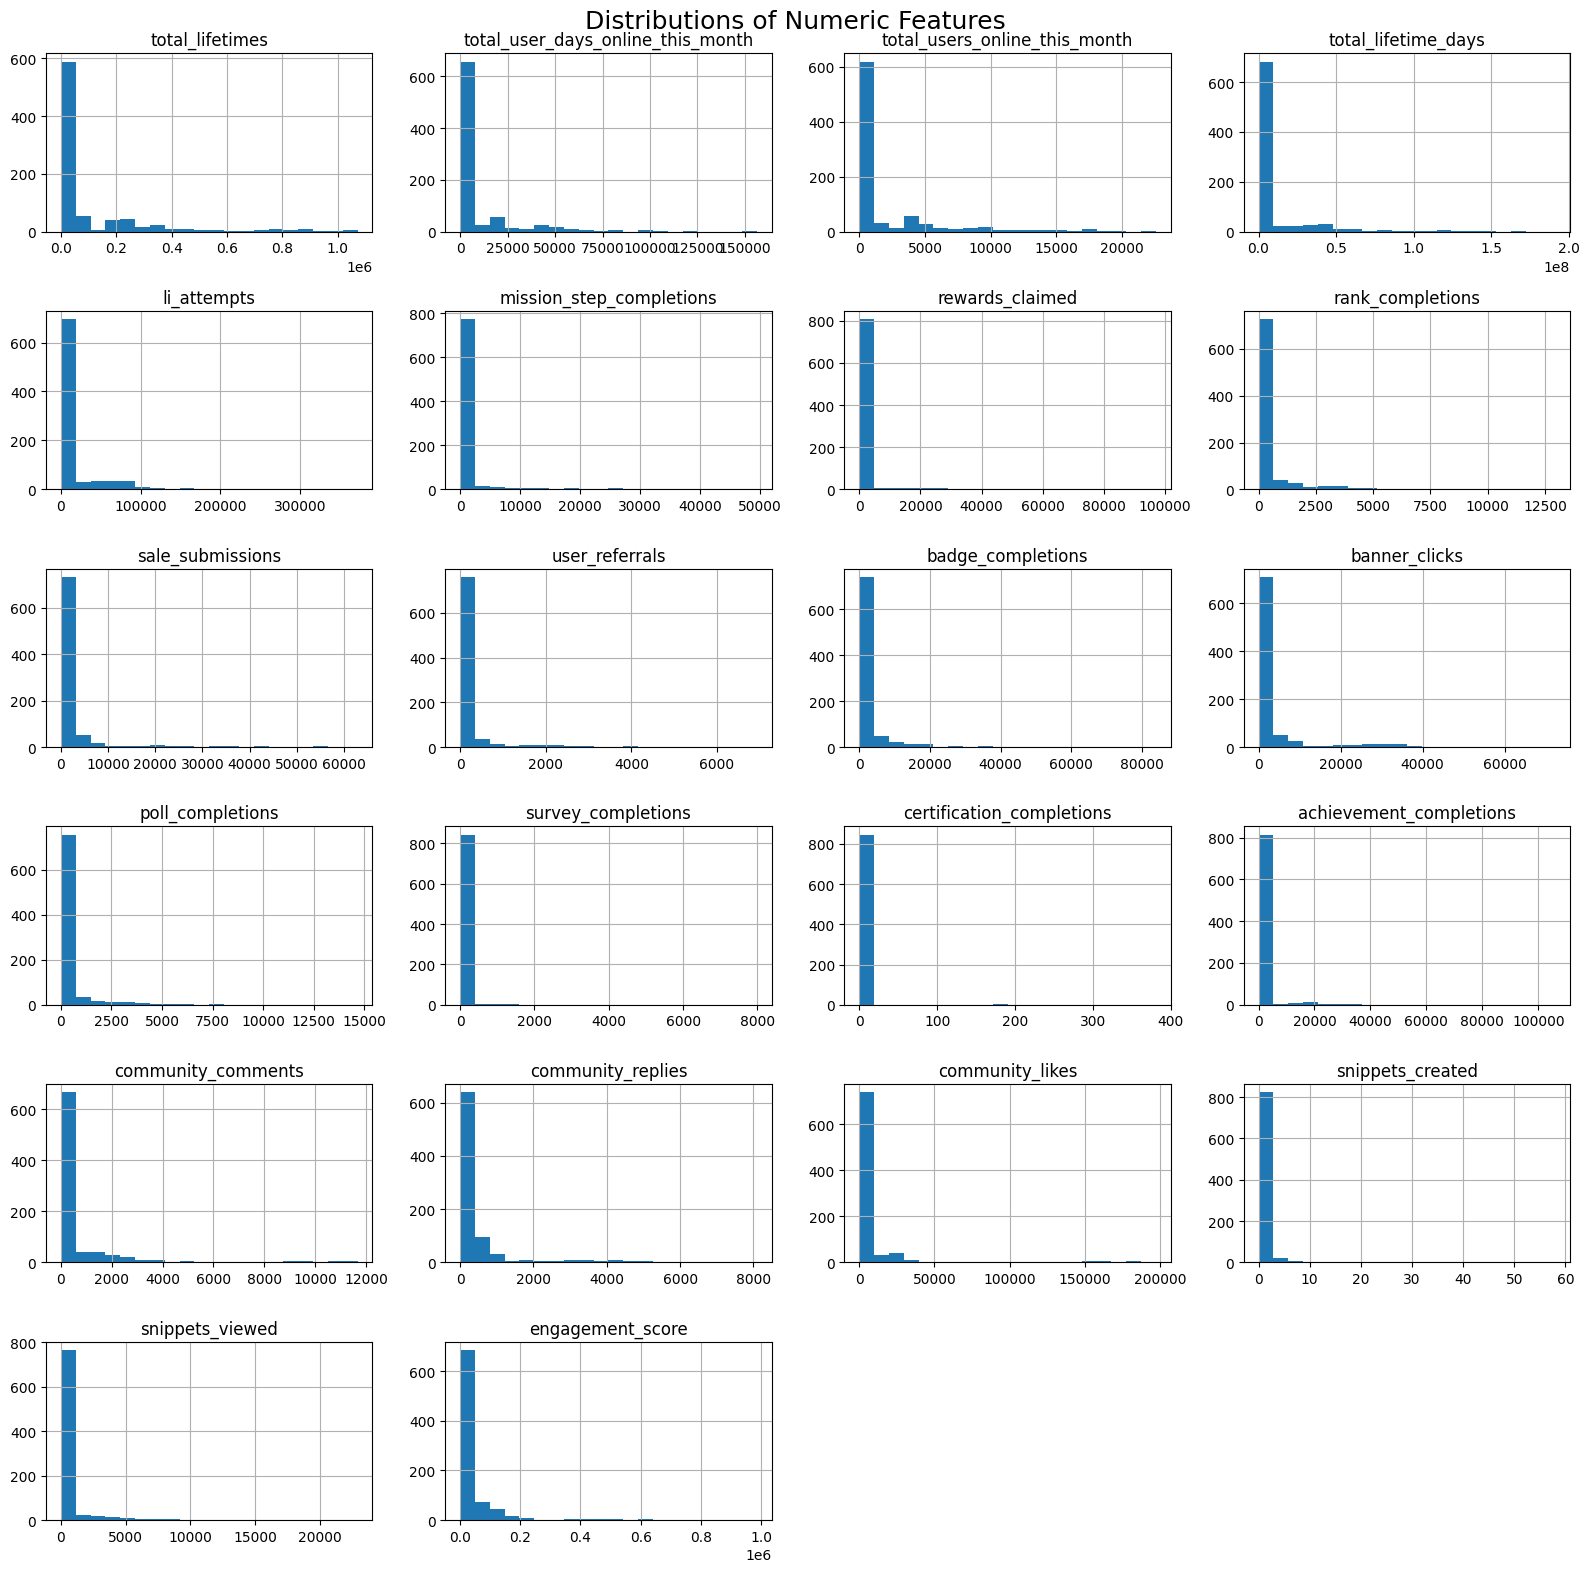

In [ ]:
# Visualize the distribution of numeric features
numeric_cols = rcs.select_dtypes(include=['float64', 'int64']).columns

rcs[numeric_cols].hist(figsize=(16, 16), bins=20, layout=(6, 4))
plt.suptitle('Distributions of Numeric Features', fontsize=18)
plt.tight_layout()
plt.show()

Originally, the numeric variables were heavily right-skewed. Most rows contained very small values (close to zero), while a few had extremely large ones. 

Since this dataset represents engagement activity, this pattern suggests that a small number of users or sites are very active, whereas the majority show low or minimal engagement.

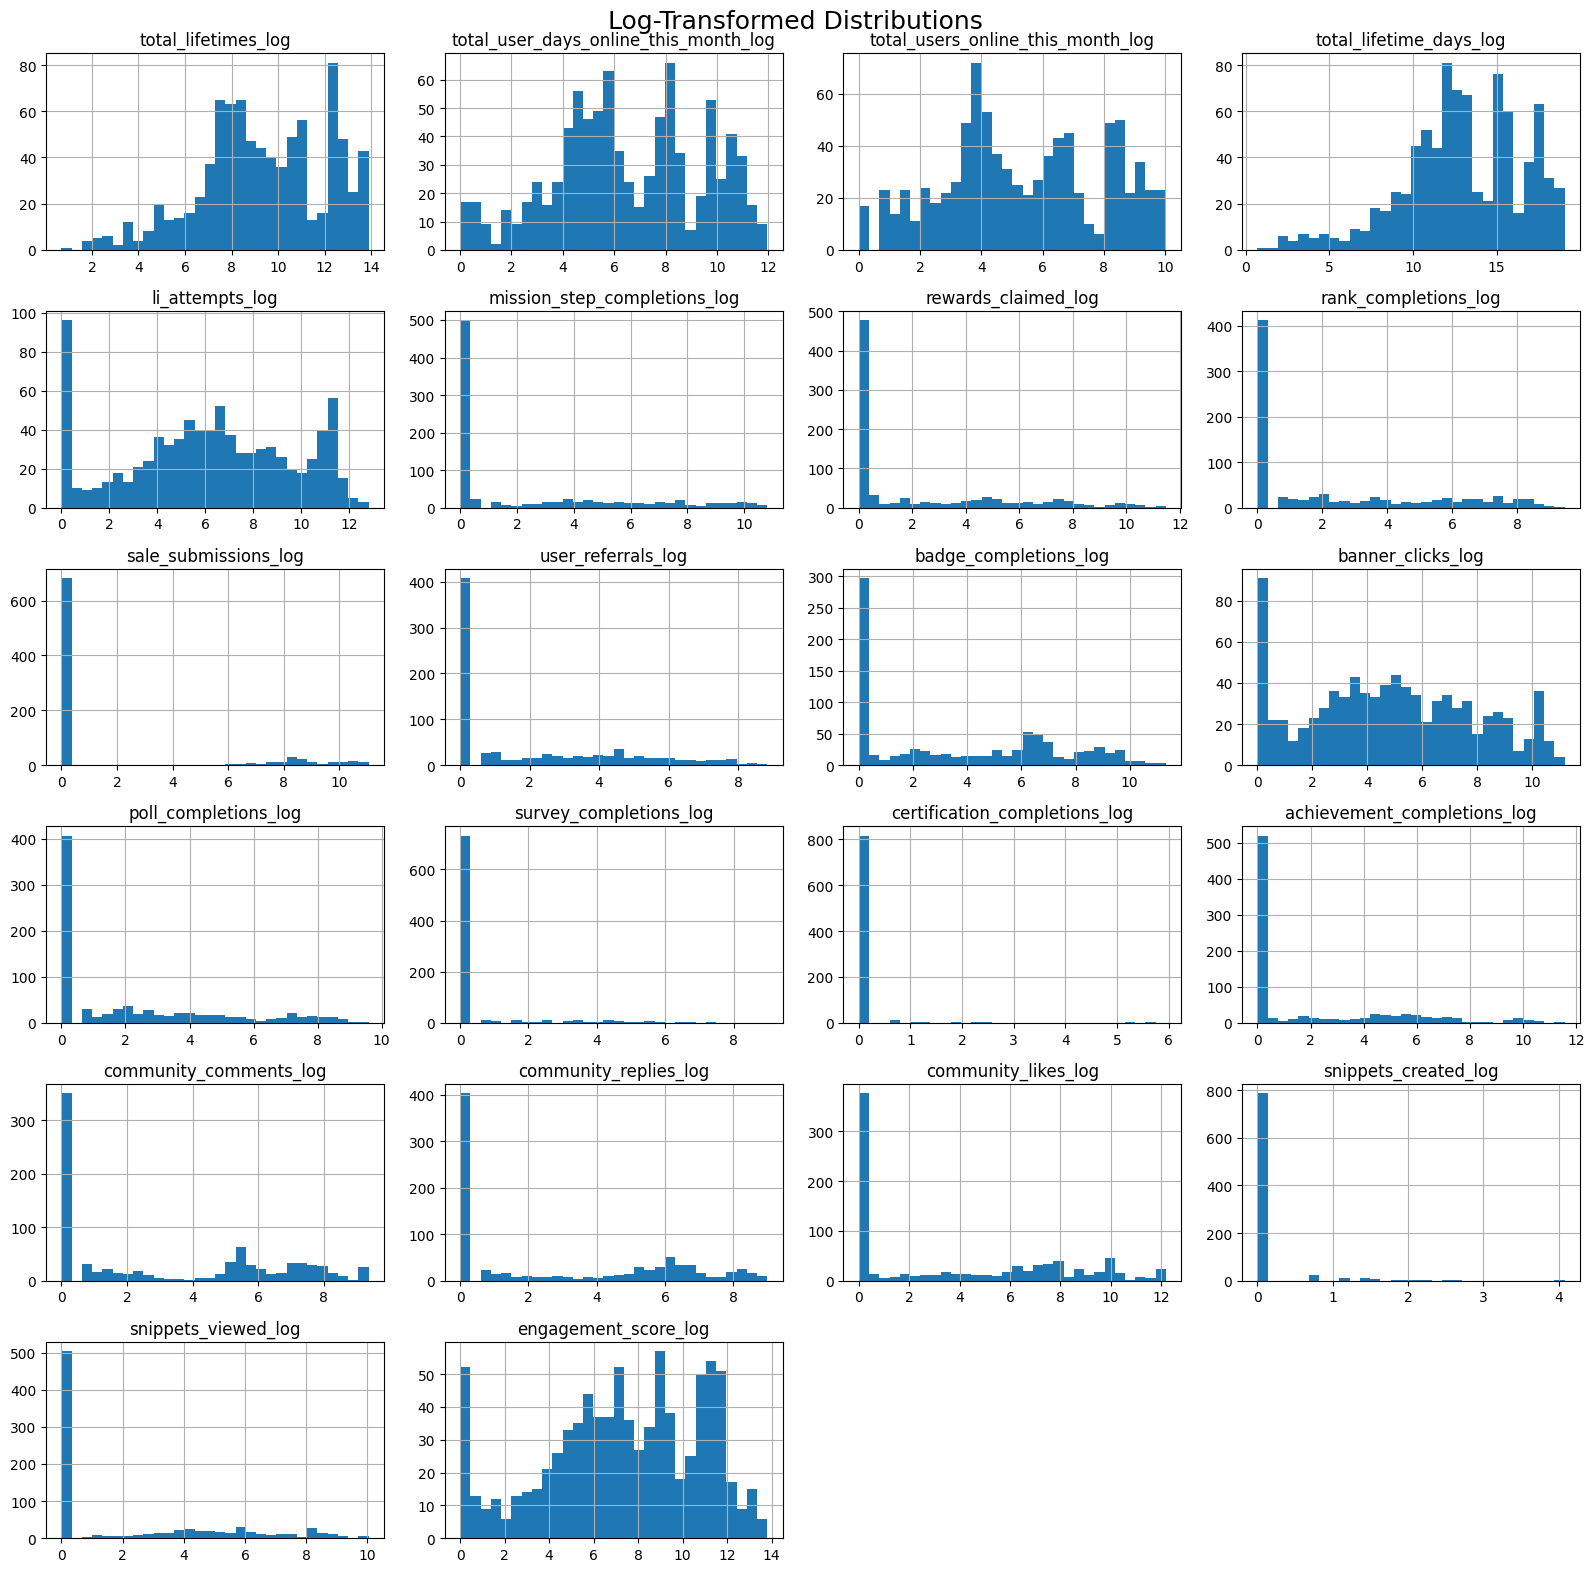

In [ ]:
# Log transformation (for skewed data)
for col in numeric_cols:
    rcs[f'{col}_log'] = np.log1p(rcs[col])  # log1p handles zeros safely

rcs[[f'{col}_log' for col in numeric_cols]].hist(figsize=(16, 16), bins=30, layout=(6, 4))   # 6 rows, 4 columns

plt.suptitle('Log-Transformed Distributions', fontsize=18)
plt.tight_layout()  # adjust spacing
plt.show()

After applying the log transformation, most numeric variables show a clearer and more balanced distribution. This confirms that the original data was highly right-skewed, dominated by a few very active users or sites.

Variables such as **total_user_days_online_this_month, total_users_online_this_month, and engagement_score** display more symmetric shapes, indicating a consistent pattern of user activity.

In contrast, completion-type metrics (e.g., poll_completions, survey_completions, certification_completions) remain concentrated near zero, suggesting that only a small portion of users engage in these actions.

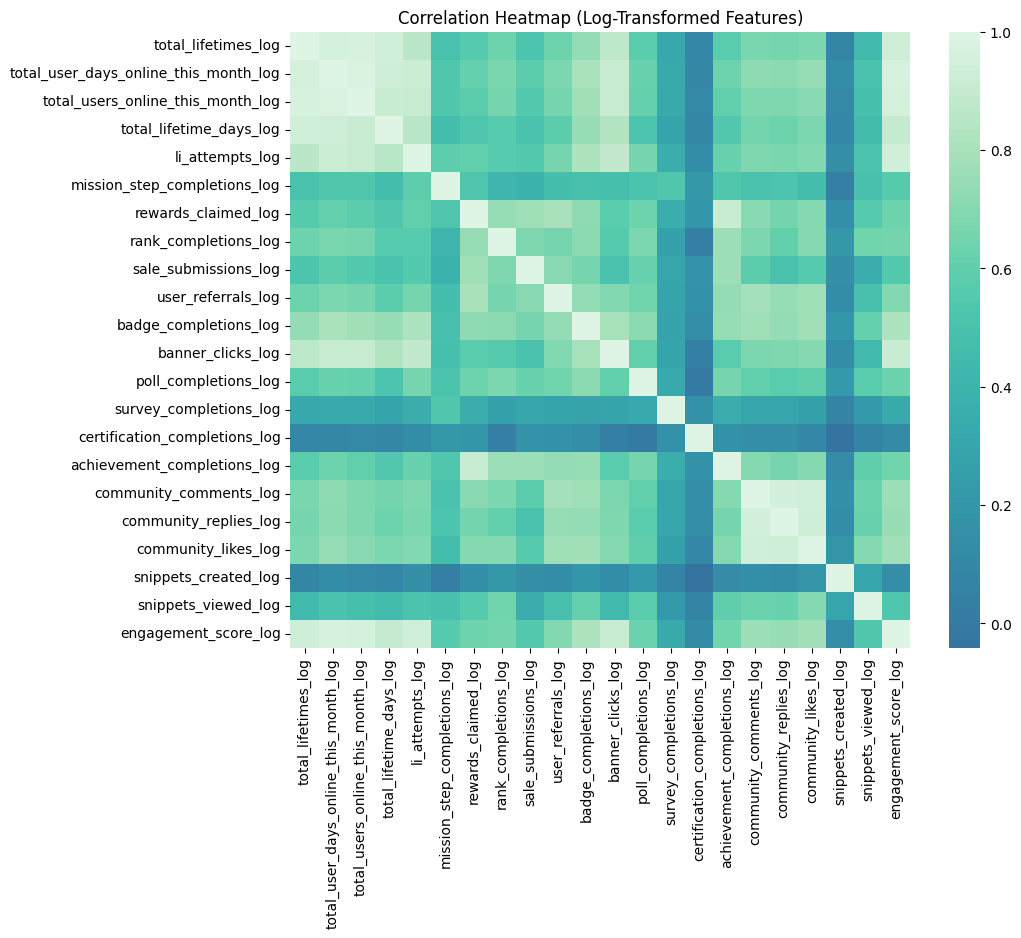

In [ ]:
# Compute and visualize the correlation matrix of log-transformed variables
log_cols = [col for col in rcs.columns if col.endswith('_log')]

plt.figure(figsize=(16, 14))
sns.heatmap(rcs[log_cols].corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.title('Correlation Heatmap (Log-Transformed Features)')
plt.show()

The correlation heatmap of log-transformed features shows **strong positive relationships** among most engagement-related variables, especially those **measuring user activity** (e.g., total user days, total users, and engagement scores).

**Social interaction variables (comments, likes, replies)** exhibit moderate correlations, suggesting that these behaviors are somewhat independent but still follow general engagement patterns. 

In contrast, metrics related to surveys, certifications, and snippets show low correlations, indicating they represent more specific or occasional user actions.

In [ ]:
# Correlation of all log-transformed features with engagement score
corr_with_eng = rcs[[c for c in rcs.columns if c.endswith('_log')]].corr()['engagement_score_log'].sort_values(ascending=False)
corr_with_eng

engagement_score_log                     1.000000
total_user_days_online_this_month_log    0.965728
total_users_online_this_month_log        0.954274
li_attempts_log                          0.940644
total_lifetimes_log                      0.929484
banner_clicks_log                        0.907603
total_lifetime_days_log                  0.894240
badge_completions_log                    0.815647
community_likes_log                      0.773380
community_comments_log                   0.761182
community_replies_log                    0.749936
user_referrals_log                       0.691257
rank_completions_log                     0.652160
achievement_completions_log              0.644410
rewards_claimed_log                      0.635833
poll_completions_log                     0.626671
mission_step_completions_log             0.554214
sale_submissions_log                     0.552225
snippets_viewed_log                      0.532670
survey_completions_log                   0.332707


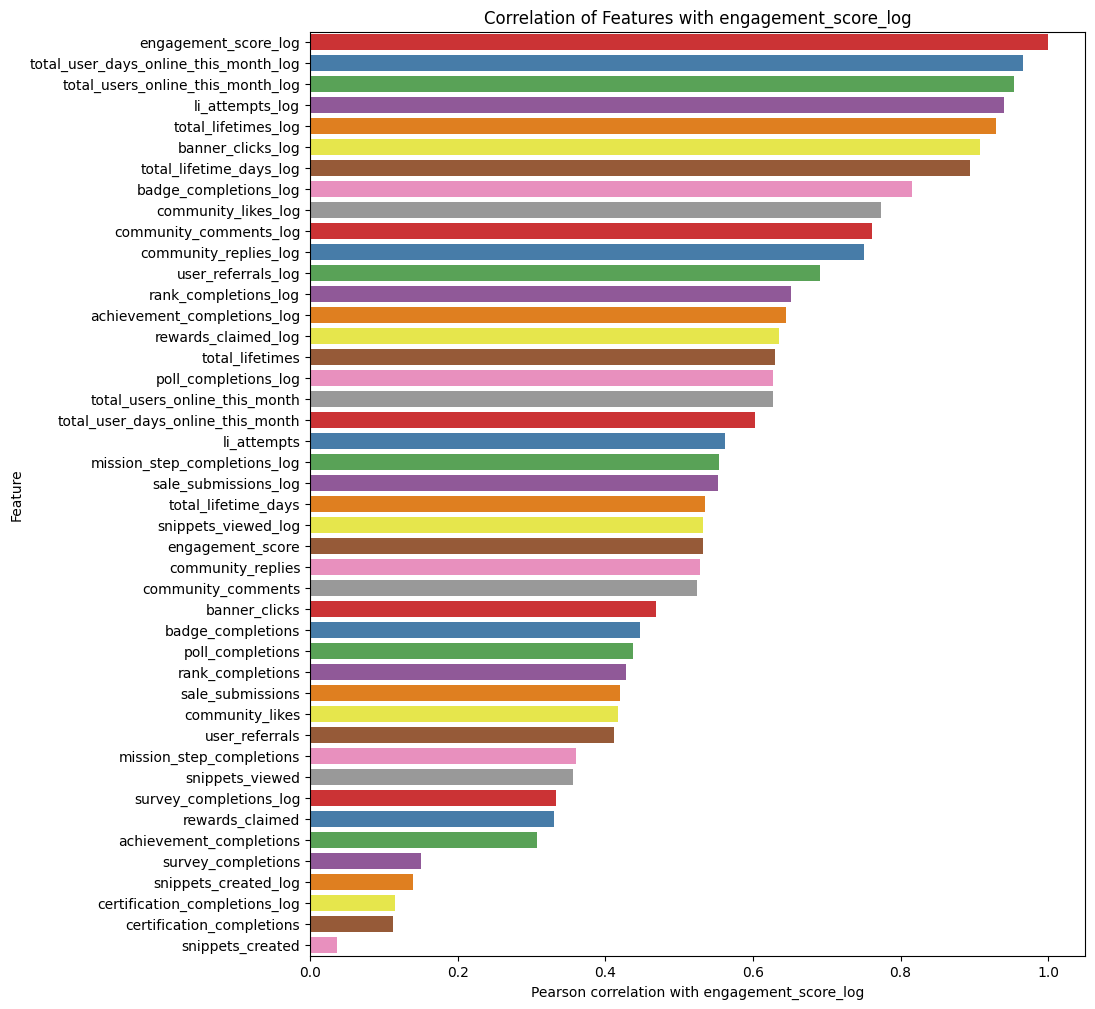

In [ ]:
# Visualize correlation of all numeric features with 'engagement_score_log'
corr = rcs.corr(numeric_only=True)['engagement_score_log'].sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=corr.values, y=corr.index, palette="Set1")
plt.title("Correlation of Features with engagement_score_log")
plt.xlabel("Pearson correlation with engagement_score_log")
plt.ylabel("Feature")
plt.show()

The correlation analysis shows that engagement is strongly influenced by general activity metrics, such as total_user_days_online_this_month_log, total_users_online_this_month_log, and total_lifetimes_log. These variables describe general presence and participation (e.g. how long, how often, and how many people are active, instead of what specific things they do).

Moderate correlations are observed for features like banner_clicks_log, badge_completions_log, and community_likes_log, which represent interactive behaviors that contribute to engagement but are not as dominant as overall activity.

In contrast, variables such as survey_completions_log, certification_completions_log, and snippets_created_log show weak correlations, suggesting that these actions are more specialized and less common across the dataset.

**Overall, the analysis confirms that consistent user activity is the key driver of engagement, while social and reward-based interactions provide additional but secondary contributions.**

## Next Steps

We would like to implement the `Machine Learning Techniques` below for predictive analyses:
- Prediction future engagement score for future months based on past patterns (Regression)
- Predict rewards claimed (Regression)
- Predict User Lifetime - Days (Regression)
- Client Segmentation (K-Means Clustering)
- Predict `High Engagement` vs `Low Engagement` (Classification - denoted each by 1s and 0s)
- Predict regional performance (Classification)